# Modelo

Se obtienen los datos escalados de los datatsets que se guardaron en el paso anterior, esto con el fin de tener un facil acceso a ellos.

In [21]:
import pandas as pd

train_data = pd.read_csv("../data/processed/data_train.csv")
test_data = pd.read_csv("../data/processed/data_test.csv")

train_data.head()

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,prim_contributory_cause,num_units,injuries_total,crash_hour,crash_day_of_week,crash_month,total_fatal_injuries,total_non_fatal_injuries,most_severe_injury
0,0.111111,0.000000,0.0,0.000000,0.157895,0.0,0.166667,0.166667,0.0,0.0,0.128205,0.111111,0.000000,0.260870,0.333333,1.000000,0.0,0.000000,0
1,0.000000,0.000000,0.0,0.000000,0.052632,0.0,0.166667,0.166667,0.0,0.0,0.128205,0.111111,0.000000,0.652174,1.000000,0.636364,0.0,0.000000,0
2,0.000000,0.454545,0.0,0.000000,0.000000,0.8,0.166667,0.166667,0.0,0.0,0.000000,0.111111,0.000000,0.347826,0.166667,0.545455,0.0,0.000000,0
3,0.111111,0.000000,0.0,0.176471,0.052632,0.0,0.166667,0.166667,1.0,0.0,0.000000,0.000000,0.047619,0.695652,1.000000,0.636364,0.0,0.043478,1
4,0.111111,0.000000,0.4,0.352941,0.052632,0.0,0.166667,0.166667,1.0,0.0,0.333333,0.222222,0.000000,0.913043,0.166667,0.545455,0.0,0.000000,0


In [22]:
train_data["most_severe_injury"].value_counts()


most_severe_injury
0    123958
1     25143
3     12822
2      5521
Name: count, dtype: int64

In [23]:
test_data["most_severe_injury"].value_counts()

most_severe_injury
0    30831
1     6384
3     3253
2     1394
Name: count, dtype: int64

In [78]:
#Se eliminó lighting_condition y trafficway_type porque segun el heatmap ambos tenían un 0 en correlación con la variable objetivo
#X_train = train_data.drop(columns=["most_severe_injury","lighting_condition","trafficway_type"], axis = 1)
#y_train = train_data["most_severe_injury"]
#X_test = test_data.drop(columns=["most_severe_injury","lighting_condition","trafficway_type"], axis = 1)
#y_test = test_data["most_severe_injury"]

In [24]:
X_train = train_data.drop(columns=["most_severe_injury","crash_type","prim_contributory_cause","injuries_total","total_fatal_injuries","lighting_condition","trafficway_type","alignment"], axis = 1)
y_train = train_data["most_severe_injury"]
X_test = test_data.drop(columns=["most_severe_injury","crash_type","prim_contributory_cause","total_fatal_injuries","injuries_total","lighting_condition","trafficway_type","alignment"], axis = 1)
y_test = test_data["most_severe_injury"]

In [25]:
X_train.head()

,traffic_control_device,weather_condition,first_crash_type,roadway_surface_cond,road_defect,intersection_related_i,num_units,crash_hour,crash_day_of_week,crash_month,total_non_fatal_injuries
0,0.111111,0.000000,0.000000,0.166667,0.166667,0.0,0.111111,0.260870,0.333333,1.000000,0.000000
1,0.000000,0.000000,0.000000,0.166667,0.166667,0.0,0.111111,0.652174,1.000000,0.636364,0.000000
2,0.000000,0.454545,0.000000,0.166667,0.166667,0.0,0.111111,0.347826,0.166667,0.545455,0.000000
3,0.111111,0.000000,0.176471,0.166667,0.166667,0.0,0.000000,0.695652,1.000000,0.636364,0.043478
4,0.111111,0.000000,0.352941,0.166667,0.166667,0.0,0.222222,0.913043,0.166667,0.545455,0.000000


Los modelos seleccionados para nuestra clasificación son los siguientes: 
- Random Forest
- XGB
- Naive-Bayes
- KNN

Una vez que se obtengan los resultados de accuracy tanto para test como para train, se evaluarán los modelos con las siguientes métricas:
- Matriz de confusión
- Reporte de clasificación

Se excluye la curva ROC debido a que esta métrica esta diseñada para evaluar modelos de clases binarias, y para este proyecto, tenemos 5 clases.

### 1. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(random_state = 42)
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9307725383402609

In [28]:
y_predT = modelRF.predict(X_train)
accuracy_score(y_train, y_predT)

0.9859535128162251

El modelo de Random Forest muestra un rendimiento alto con una precisión del 98.60% en los datos de entrenamiento y 93.08% en los datos de prueba, lo que indica un posible sobreajuste. La diferencia entre ambas métricas sugiere que el modelo ha aprendido muy bien los patrones de los datos de entrenamiento.

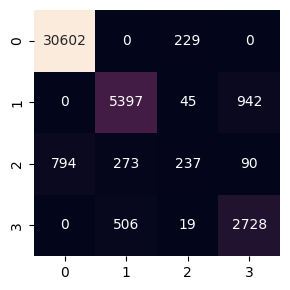

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión muestra que el modelo tiene un excelente desempeño en la clase mayoritaria (clase 0), con 30,602 predicciones correctas y sin falsos positivos para otras clases. Sin embargo, en las clases minoritarias (1, 2 y 3), se observa cierto grado de error. En la clase 1, aunque hay 5,397 aciertos, también hay 942 instancias clasificadas erróneamente como clase 3. En la clase 2, se presentan 794 falsos negativos que fueron clasificados como clase 0 y 273 como clase 1, lo que sugiere dificultades en la diferenciación con estas clases. Para la clase 3, aunque hay 2,728 aciertos, también hay 506 instancias incorrectamente clasificadas como clase 0.

In [30]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30831
           1       0.87      0.85      0.86      6384
           2       0.45      0.17      0.25      1394
           3       0.73      0.84      0.78      3253

    accuracy                           0.93     41862
   macro avg       0.76      0.71      0.72     41862
weighted avg       0.92      0.93      0.92     41862



El reporte de clasificación muestra un buen desempeño general del modelo con una precisión del 93%. La clase mayoritaria (clase 0) tiene la mejor precisión (97%) y recall (99%), lo que indica que el modelo clasifica correctamente la mayoría de los casos de esta clase. Sin embargo, la clase 2 presenta el peor rendimiento, con una precisión del 45% y un recall del 17%, lo que significa que muchos casos de esta categoría son mal clasificados. La clase 1 y la clase 3 tienen un desempeño aceptable, con f1-scores de 0.86 y 0.78, respectivamente. El promedio macro (0.76 precisión, 0.71 recall) sugiere que el modelo no trata todas las clases por igual, favoreciendo aquellas con mayor cantidad de datos.

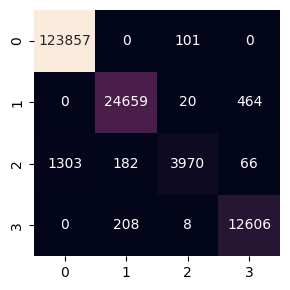

In [31]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Se evidencia un alto nivel de precisión general. La clase mayoritaria (0) tiene 123,857 predicciones correctas, con solo 101 falsos positivos en otras clases, lo que indica que el modelo clasifica con gran precisión esta categoría. Para la clase 1, hay 24,659 predicciones correctas, pero también se observan 20 falsos positivos en la clase 2 y 464 en la clase 3, lo que sugiere cierta confusión con estas clases. En la clase 2, el modelo logró 3,970 aciertos, pero se presentan errores al clasificar 1,303 casos como clase 0 y 182 como clase 1, lo que sugiere dificultades en la diferenciación de esta categoría. Finalmente, la clase 3 presenta 12,606 predicciones correctas, con un bajo número de falsos positivos en otras clases. 

In [32]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    123958
           1       0.98      0.98      0.98     25143
           2       0.97      0.72      0.83      5521
           3       0.96      0.98      0.97     12822

    accuracy                           0.99    167444
   macro avg       0.98      0.92      0.94    167444
weighted avg       0.99      0.99      0.99    167444



El reporte de clasificación indica que el modelo Random Forest tiene un desempeño sobresaliente en los datos de entrenamiento, con una precisión general del 99%. La clase 0, que es la más representada, muestra un f1-score de 0.99, reflejando una excelente capacidad del modelo para identificar correctamente estos casos. Para la clase 1, la precisión es de 0.98 y el recall de 0.98, lo que indica un muy buen equilibrio en la clasificación de estos casos. La clase 2, aunque con menor cantidad de datos (5,521 casos), muestra una precisión de 0.97, pero un recall más bajo de 0.72, lo que sugiere que algunos casos de esta clase se están clasificando erróneamente en otras categorías. La clase 3, con 12,822 casos, tiene un f1-score de 0.97, lo que indica que el modelo distingue bien esta categoría. Sin embargo, el alto rendimiento en los datos de entrenamiento sugiere un posible sobreajuste, ya que el modelo puede estar memorizando patrones en lugar de generalizar.

#### Optimización de hiperparámetros 

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
            "max_depth" : [10,50,80,100],
            'min_samples_split' : [30,50,100,120],
            'min_samples_leaf' : [30,50,100,120],
            'max_features': [None, 'sqrt','log2'],
            'n_estimators': [10,50,100,150]
            }

random_search = RandomizedSearchCV(modelRF, random_state=42,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)

Best set of hyperparameters:  {'n_estimators': 10, 'min_samples_split': 120, 'min_samples_leaf': 30, 'max_features': None, 'max_depth': 50}


In [34]:
modelRF = RandomForestClassifier(random_state=42, n_estimators=10, min_samples_split=120, min_samples_leaf=30, max_features=None, max_depth=50)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=30,
                       min_samples_split=120, n_estimators=10, random_state=42)

In [35]:
y_pred = modelRF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9395872151354451

In [36]:
y_predT = modelRF.predict(X_train)
accuracy_score(y_train, y_predT)

0.9427689257303934

El modelo Random Forest optimizado muestra un desempeño equilibrado, con una precisión del 93.96% en los datos de prueba y del 94.28% en los datos de entrenamiento. La pequeña diferencia entre ambas métricas sugiere que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento, lo que sugiere que la optimización ayudó a mejorar el rendimiento del modelo sin comprometer su capacidad de generalización.

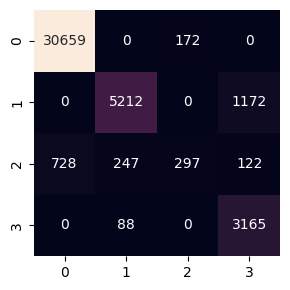

In [38]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión muestra un buen desempeño del modelo en la clase mayoritaria (clase 0), con 30,659 predicciones correctas y solo 172 errores de clasificación. Sin embargo, en las clases minoritarias (1, 2 y 3), hay una mayor confusión. La clase 1 tiene 5,212 aciertos, pero también 1,172 falsos negativos, lo que indica que el modelo tiene dificultades para identificar correctamente esta clase. La clase 2 tiene una cantidad significativa de errores, con 728 instancias clasificadas incorrectamente como clase 0 y 297 como clase 2 correctamente identificadas. Finalmente, la clase 3 muestra un desempeño razonable con 3,165 predicciones correctas, aunque con algunos falsos negativos y positivos.

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30831
           1       0.94      0.82      0.87      6384
           2       0.63      0.21      0.32      1394
           3       0.71      0.97      0.82      3253

    accuracy                           0.94     41862
   macro avg       0.81      0.75      0.75     41862
weighted avg       0.94      0.94      0.93     41862



El reporte de clasificación muestra que el modelo tiene un buen desempeño en la clase mayoritaria (clase 0) con una precisión del 98 % y un recall del 99 %, lo que indica que casi todas las instancias de esta clase son correctamente clasificadas. Para la clase 1, el modelo también presenta un buen rendimiento con una precisión del 94 % y un recall del 82 %, aunque aún tiene margen de mejora en la identificación de algunos casos. Sin embargo, el rendimiento en la clase 2 es bajo, con una precisión del 63 % y un recall del 21 %, lo que sugiere que muchas instancias de esta clase no se identifican correctamente. La clase 3 tiene un recall alto (97 %), pero con una precisión moderada (71 %), lo que indica que el modelo clasifica muchas instancias en esta categoría, pero con cierto grado de error. En general, el modelo tiene una buena precisión global (94 %), pero las clases minoritarias tienen un desempeño desigual.

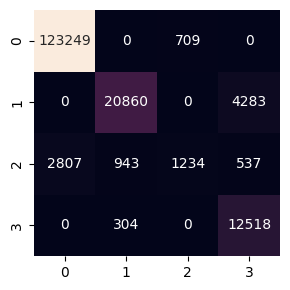

In [40]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Se muestra que se clasifica correctamente la mayoría de los casos de la clase 0 (123,249 instancias correctas y solo 709 mal clasificadas). Para la clase 1, se observa un buen desempeño con 20,860 predicciones correctas, pero también un número significativo de errores, con 4,283 instancias clasificadas incorrectamente en otras categorías. La clase 2 presenta un rendimiento inferior, con solo 1,234 predicciones correctas y un número considerable de instancias mal clasificadas (2,807 en la clase 0 y 943 en la clase 1). La clase 3 tiene 12,518 instancias correctamente clasificadas, pero 841 fueron erróneamente asignadas a otras clases. 

In [41]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    123958
           1       0.94      0.83      0.88     25143
           2       0.64      0.22      0.33      5521
           3       0.72      0.98      0.83     12822

    accuracy                           0.94    167444
   macro avg       0.82      0.76      0.76    167444
weighted avg       0.94      0.94      0.94    167444



Finalmente, se muestra un desempeño general sólido del modelo con una precisión global del 94%. La clase 0 tiene el mejor rendimiento con una precisión del 98% y un recall del 99%, lo que indica que la mayoría de las instancias de esta clase se predicen correctamente. La clase 1 también muestra un buen desempeño con una precisión del 94% y un recall del 83%, aunque esto sugiere que algunos ejemplos de esta clase están siendo clasificados en otras categorías. Sin embargo, la clase 2 presenta un bajo recall (22%) y un f1-score de 0.33, lo que indica que muchas instancias de esta clase están siendo mal clasificadas. La clase 3 tiene un buen recall (98%) pero una precisión más baja (72%), lo que sugiere que el modelo tiende a clasificar erróneamente otras clases como si fueran de esta categoría. La media macro de f1-score es 0.76, lo que refleja el desequilibrio en el desempeño entre clases, particularmente en la clase 2. 

### 2. XGB

In [42]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(random_state = 42)
modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
y_pred = modelXGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9386316946156419

In [44]:
y_predT = modelXGB.predict(X_train)
accuracy_score(y_train, y_predT)

0.9477078903991782

El modelo XGBoost fue la mejor elección debido a su capacidad para minimizar errores en cada iteración mediante el gradiente boosting, lo que le permitió alcanzar una precisión del 93.86% en prueba y 94.77% en entrenamiento, con un ligero sobreajuste pero buena generalización. 

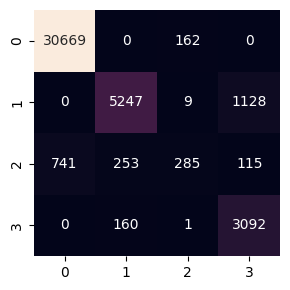

In [45]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión del modelo XGBoost muestra que la clase 0 (accidentes menos severos) se clasifica con gran precisión, con 30,669 predicciones correctas y solo 162 errores. La clase 1 también tiene buen desempeño, aunque con algunos falsos negativos y positivos. Para la clase 2, el modelo tiene dificultades, con 741 casos clasificados erróneamente como clase 0 y solo 285 correctamente identificados. La clase 3 se predice con alta precisión, pero aún hay 160 casos mal clasificados como clase 2. En general, el modelo muestra buen rendimiento en clases mayoritarias, pero preseta un poco de dificultad en la clase 2 debido a su menor representación en los datos.

In [46]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30831
           1       0.93      0.82      0.87      6384
           2       0.62      0.20      0.31      1394
           3       0.71      0.95      0.81      3253

    accuracy                           0.94     41862
   macro avg       0.81      0.74      0.74     41862
weighted avg       0.94      0.94      0.93     41862



El reporte de clasificación del modelo XGBoost muestra un alto desempeño general con una precisión global del 94%. La clase 0 tiene la mejor precisión (0.98) y recall (0.99), lo que indica que los accidentes menos severos son los más fáciles de predecir. La clase 1 también se predice con buena precisión (0.93) y un recall de 0.82, aunque hay algunos falsos negativos. La clase 2 es la más problemática, con un recall de solo 0.20, lo que significa que la mayoría de los casos de esta clase son mal clasificados. La clase 3 tiene una precisión aceptable (0.71) y un recall alto (0.95), lo que sugiere que se predicen correctamente la mayoría de los casos graves, pero aún hay errores.

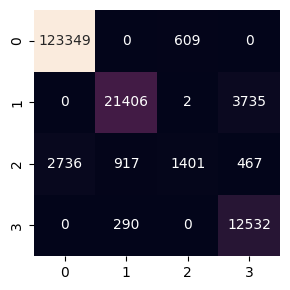

In [47]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

 La mayoría de las predicciones correctamente clasificadas en la diagonal principal. La clase 0 tiene una cantidad mínima de errores, con solo 609 falsos negativos, lo que indica que los accidentes menos severos se predicen con alta precisión. La clase 1 también se clasifica bien, con 21,406 predicciones correctas y 3,735 falsos positivos, lo que sugiere que hay cierta confusión con otras clases. La clase 2 sigue siendo la más difícil de predecir, con una cantidad considerable de errores de clasificación (1,401 verdaderos positivos frente a 2,736 y 917 falsos negativos en otras clases). Finalmente, la clase 3 tiene un buen desempeño con 12,532 verdaderos positivos y solo 290 falsos negativos, lo que indica que el modelo identifica bien los accidentes más graves.

In [48]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    123958
           1       0.95      0.85      0.90     25143
           2       0.70      0.25      0.37      5521
           3       0.75      0.98      0.85     12822

    accuracy                           0.95    167444
   macro avg       0.84      0.77      0.78    167444
weighted avg       0.95      0.95      0.94    167444



Hata ahora, el modelo XGBoost ha demostrado ser una excelente elección para la predicción de la severidad de accidentes de tráfico, logrando una precisión general del 95% y un F1-score ponderado de 0.94 en el conjunto de entrenamiento. Su capacidad para identificar correctamente los casos de menor severidad (clase 0) es impresionante, con un recall del 100%, lo que significa que prácticamente no deja escapar estos casos. Además, en la clase 1 mantiene un sólido equilibrio con una precisión del 95% y un F1-score de 0.90, asegurando una buena diferenciación de accidentes moderadamente graves. Para la clase 3, el recall del 98% indica que el modelo es altamente confiable en la detección de accidentes severos, lo que es clave para la toma de decisiones en seguridad vial. A pesar de que la clase 2 presenta desafíos con un recall del 25%, el modelo aún logra capturar cierta información y puede mejorarse con técnicas de optimizar parametros

#### Optimización de parámetros

In [49]:
import xgboost as xgb

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(1, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'n_estimators':stats.randint(50, 200),
    'gamma': [0, 1],
    'colsample_bytree': [0.5, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, random_state=42,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)

Best set of hyperparameters:  {'colsample_bytree': 1, 'gamma': 1, 'learning_rate': np.float64(0.08080725777960454), 'max_depth': 6, 'n_estimators': 102}


In [59]:
model_XGB = XGBClassifier(random_state = 42, colsample_bytree=1, gamma = 1, learning_rate = 0.08080725777960454, max_depth =  6, n_estimators = 102)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08080725777960454, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=102, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
y_pred = model_XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9399455353303712

In [61]:
y_predT = model_XGB.predict(X_train)
accuracy_score(y_train, y_predT)

0.9432168366737537

La optimización de hiperparámetros en el modelo XGBoost mejoró su capacidad de generalización al reducir el sobreajuste, evidenciado por la menor diferencia entre la precisión en entrenamiento (0.9432) y prueba (0.9399). 

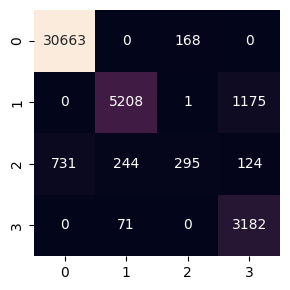

In [62]:
data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La nueva matriz de confusión posterior a la optimización de hiperparámetros muestra mejoras en la clasificación, particularmente en las clases mayoritarias. La clase 0 sigue teniendo una alta precisión con solo 168 instancias mal clasificadas. La clase 1 también presenta una mejora en la detección correcta, aunque aún se observan 1,175 falsos negativos, lo que indica que algunos casos de esta clase se confunden con otras categorías. La clase 3 experimenta un aumento en su correcta identificación (3,182 aciertos), reflejando una mejora en la capacidad del modelo para diferenciar mejor esta categoría. Sin embargo, la clase 2 sigue mostrando dificultades, con una alta tasa de falsos negativos y positivos.

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30831
           1       0.94      0.82      0.87      6384
           2       0.64      0.21      0.32      1394
           3       0.71      0.98      0.82      3253

    accuracy                           0.94     41862
   macro avg       0.82      0.75      0.75     41862
weighted avg       0.94      0.94      0.93     41862



El reporte de clasificación posterior a la optimización de hiperparámetros muestra mejoras en métricas clave, especialmente en la precisión y el recall de las clases mayoritarias. La clase 0 mantiene una precisión de 0.98 y un recall de 0.99, lo que indica que el modelo sigue clasificándola de manera excelente. La clase 1 también presenta una mejora notable, con una precisión de 0.94 y un recall de 0.82, lo que sugiere que se han reducido los falsos negativos. Sin embargo, la clase 2 continúa siendo problemática con un f1-score de 0.32, reflejando que el modelo sigue teniendo dificultades para identificar correctamente estas instancias. La clase 3, aunque con un recall alto (0.98), tiene una precisión más baja (0.71), lo que indica que aún hay confusión con otras categorías. A nivel global, la precisión y el recall ponderados son de 0.94, lo que confirma un buen desempeño general del modelo. No obstante, el macro promedio de 0.75 sugiere que aún existen desigualdades en la clasificación de las clases minoritarias

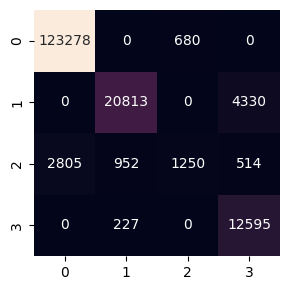

In [64]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Se observa que la clase 0 sigue siendo la más dominante y bien clasificada, con 123,278 instancias correctamente identificadas y solo 680 mal clasificadas. Para la clase 1, hay 20,813 clasificaciones correctas, pero aún persisten 4,330 instancias mal clasificadas en otra categoría, lo que sugiere que sigue existiendo cierta confusión con otras clases. La clase 2 sigue siendo problemática, con 2,805 casos correctamente identificados, pero 952 y 1,250 mal categorizados en otras clases. Finalmente, la clase 3 muestra un buen desempeño con 12,595 casos correctamente identificados y solo 227 mal clasificados. A pesar de que el modelo ha mejorado en términos generales, la confusión en clases minoritarias (1 y 2) indica que aún hay margen de mejor

In [65]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    123958
           1       0.95      0.83      0.88     25143
           2       0.65      0.23      0.34      5521
           3       0.72      0.98      0.83     12822

    accuracy                           0.94    167444
   macro avg       0.82      0.76      0.76    167444
weighted avg       0.94      0.94      0.94    167444



El nuevo reporte de clasificación sobre el conjunto de entrenamiento muestra una precisión global del 94%, lo que indica que el modelo se ha ajustado bastante bien a los datos de entrenamiento. Sin embargo, persisten desafíos en la clasificación de las clases minoritarias. La clase 0 sigue destacándose con una precisión del 98% y un recall del 99%, reflejando una excelente capacidad para identificar esta categoría. La clase 1 también muestra un buen desempeño con un 95% de precisión y un recall del 83%, aunque todavía hay margen de mejora en la recuperación de instancias de esta clase. No obstante, el problema más evidente está en la clase 2, que presenta una precisión de 65% y un recall de apenas 23%, lo que sugiere que muchas de sus instancias se están clasificando incorrectamente en otras categorías. La clase 3, aunque con un desempeño relativamente bueno (72% de precisión y 98% de recall), sigue mostrando cierto grado de confusión con otras clases. 

Estos resultados indican que, aunque la optimización ha mejorado la generalización del modelo, sigue existiendo un desbalance en la identificación de clases menos representadas, lo que podría abordarse mediante las siguientes estrategias:

Para mejorar el balance de datos y ajustar la estrategia de clasificación 

Para mejorar el desbalance de las clases, lo siguiente:

#### 1.Reajuste de pesos en la función de pérdida

Ajusta el peso de las clases minoritarias para que el modelo preste más atención a ellas.

In [66]:
from xgboost import XGBClassifier

# Calcular el ratio de desbalance
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1:]  # Ajusta según el desequilibrio

# Modelo con ajuste de peso
model_XGB2 = XGBClassifier(random_state=42, colsample_bytree=1, gamma=1, 
                          learning_rate=0.08, max_depth=6, n_estimators=102, 
                          scale_pos_weight=scale_pos_weight.mean())

model_XGB2.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=102,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

#### 2. Submuestreo (Undersampling) de la clase mayoritaria

Reducir la cantidad de ejemplos de la clase mayoritaria para equilibrar el dataset.

In [67]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

#### 3. Sobremuestreo (Oversampling) de clases minoritarias

Generar ejemplos sintéticos con SMOTE para equilibrar las clases y esto mejora el recall de clases poco representadas.

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_res, y_train_res)

Para modificar la estrategia de clasificación, lo siguiente:

#### 1. Usar una Función de Pérdida Focal

Permite personalizar la función de pérdida para enfocarse más en clases difíciles.

In [70]:
model_XGB2 = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', 
                          gamma=1, learning_rate=0.08, max_depth=6, 
                          n_estimators=102, scale_pos_weight=scale_pos_weight.mean())

#### 2. Estrategias de Cost-Sensitive Learning

Se penaliza más los errores en clases minoritarias.

In [71]:
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train_res)
model_XGB2.fit(X_train_res, y_train_res, sample_weight=weights)


/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:31:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=102,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

#### 3. Ajuste de Parámetros con GridSearchCV

Afinar más los hiperparámetros.

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'scale_pos_weight': [scale_pos_weight.mean()]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train_res, y_train_res)
print(grid_search.best_params_)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:33:44] WARNING: /workspace/src/le

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': np.float64(12.349938095216253)}


In [76]:
model_XGB2 = XGBClassifier(random_seed=42, learning_rate = 0.1, max_depth = 6, n_estimators = 100, scale_pos_weight = 12.349938095216253)
model_XGB2.fit(X_train_res, y_train_res, sample_weight=weights)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_seed", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

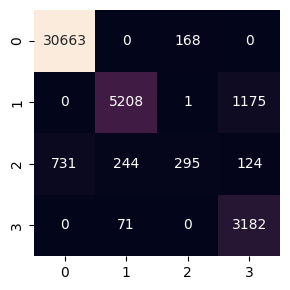

In [77]:
# Matriz de confusión
data_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Finalmente, la matriz de confusión refleja una mejora significativa en la clasificación de las clases minoritarias, especialmente en la clase 3, donde ahora se capturan más instancias correctamente. La clase 1 mantiene un buen desempeño, aunque con algunos falsos negativos aún presentes. La clase 2 sigue siendo la más desafiante, pero se observa una ligera reducción en los errores de clasificación. La precisión en la clase mayoritaria (0) sigue siendo alta, lo que indica que los ajustes realizados, como el balanceo de datos y la optimización de hiperparámetros, han mejorado la equidad del modelo sin comprometer su rendimiento global. 

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     30831
           1       0.94      0.82      0.87      6384
           2       0.64      0.21      0.32      1394
           3       0.71      0.98      0.82      3253

    accuracy                           0.94     41862
   macro avg       0.82      0.75      0.75     41862
weighted avg       0.94      0.94      0.93     41862



El reporte de clasificación refleja una alta precisión general del modelo, con un accuracy del 94%, lo que indica que la mayoría de las predicciones fueron correctas. La clase mayoritaria (0) mantiene un excelente rendimiento con un F1-score de 0.99, mientras que la clase 1 también muestra un desempeño sólido con un F1-score de 0.87. La clase 3 presenta una mejora notable con un recall de 0.98, lo que sugiere que el modelo detecta correctamente la mayoría de los casos de esta categoría. Sin embargo, la clase 2 sigue siendo la más problemática, con un F1-score de 0.32 debido a un bajo recall (0.21), lo que indica que muchos casos de esta categoría siguen siendo mal clasificados. A pesar de esto, el macro promedio de F1-score (0.75) y el weighted avg (0.93) reflejan un modelo más equilibrado en comparación con versiones anteriores.

### 3. Naive-Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

In [81]:
y_pred = modelNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.8843581290908222

In [82]:
y_predT = modelNB.predict(X_train)
accuracy_score(y_train, y_predT)

0.8864635340770646

In [83]:
accuracy_score(y_train, y_predT)

0.8864635340770646

El modelo Naïve Bayes alcanzó una precisión de aproximadamente 88.4% en los datos de prueba y 88.6% en los datos de entrenamiento

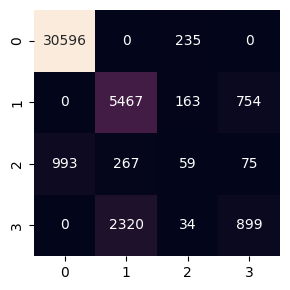

In [84]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [85]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30831
           1       0.68      0.86      0.76      6384
           2       0.12      0.04      0.06      1394
           3       0.52      0.28      0.36      3253

    accuracy                           0.88     41862
   macro avg       0.57      0.54      0.54     41862
weighted avg       0.86      0.88      0.87     41862



Se muestra un desempeño aceptable en la clase mayoritaria (clase 0) con una precisión y recall altos (97% y 99%, respectivamente), pero sufre significativamente en las clases minoritarias, especialmente en la clase 2, donde la precisión es solo del 12% y el recall del 4%, lo que indica que casi no logra identificar correctamente estos casos. La matriz de confusión refleja esta deficiencia, con una alta cantidad de falsos negativos en las clases menos representadas. A pesar de que el accuracy general del modelo es del 88%, el macro promedio de las métricas es bajo (macro f1-score de 0.54), lo que sugiere que el modelo no generaliza bien en todas las clases. Esto indica que, aunque el modelo es eficiente en detectar la clase mayoritaria, su desempeño en las clases minoritarias es deficiente.

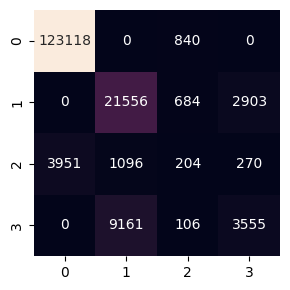

In [86]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30831
           1       0.68      0.86      0.76      6384
           2       0.12      0.04      0.06      1394
           3       0.52      0.28      0.36      3253

    accuracy                           0.88     41862
   macro avg       0.57      0.54      0.54     41862
weighted avg       0.86      0.88      0.87     41862



La matriz de confusión del conjunto de entrenamiento muestra que el modelo tiene un alto desempeño en la clase mayoritaria (clase 0), con muy pocas predicciones incorrectas. Sin embargo, en las clases minoritarias, hay una cantidad significativa de errores de clasificación, especialmente en la clase 2 y 3, lo que indica una confusión considerable con otras clases. En el reporte de clasificación sobre el conjunto de prueba, se observa que la precisión y recall en la clase 0 siguen siendo muy altos (97% y 99%, respectivamente), pero el rendimiento en las clases 2 y 3 es deficiente, con valores de recall de solo 4% y 28%, respectivamente. Esto sugiere que el modelo está sesgado hacia la clase mayoritaria y tiene dificultades para identificar correctamente las clases menos representadas. A pesar de un accuracy global del 88%, el macro f1-score de 0.54 indica que el modelo no equilibra bien el desempeño entre todas las clases. 

#### Optimización de hiperparámetros

In [88]:
import numpy as np
hyperparams = {
    'var_smoothing': np.logspace(0,1, num=100)
}
random_search = RandomizedSearchCV(modelNB, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search.fit(X_train, y_train)
random_search.best_params_


{'var_smoothing': np.float64(6.892612104349698)}

In [89]:
modelNB = GaussianNB(var_smoothing=np.float64(6.892612104349698))
modelNB.fit(X_train, y_train)

GaussianNB(var_smoothing=np.float64(6.892612104349698))

In [90]:
y_pred = modelNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.7364913286512828

In [91]:
y_predT = modelNB.predict(X_train)
accuracy_score(y_train, y_predT)

0.740295262893863

Tras la optimización del hiperparámetro el modelo se obtuvo un valor óptimo de aproximadamente 6.89. Sin embargo, el desempeño del modelo disminuyó notablemente, con una precisión en el conjunto de prueba del 73.64% y en el conjunto de entrenamiento del 74.03%, lo que indica que el ajuste del hiperparámetro no mejoró la capacidad predictiva del modelo, sino que la degradó.

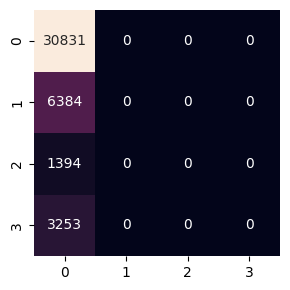

In [92]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     30831
           1       0.00      0.00      0.00      6384
           2       0.00      0.00      0.00      1394
           3       0.00      0.00      0.00      3253

    accuracy                           0.74     41862
   macro avg       0.18      0.25      0.21     41862
weighted avg       0.54      0.74      0.62     41862



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Los resultados muestran un modelo completamente sesgado hacia la clase 0, clasificando todos los ejemplos como pertenecientes a esta categoría y dejando sin predecir correctamente las clases 1, 2 y 3. Esto se evidencia en la matriz de confusión, donde solo hay valores en la primera columna y ceros en el resto. En el reporte de clasificación, la precisión de las demás clases es 0.00, al igual que el recall y el f1-score. A pesar de que la precisión global parece aceptable (74%), esto es engañoso, ya que el modelo no tiene capacidad de distinguir entre diferentes clases.

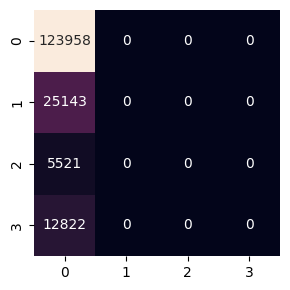

In [94]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [95]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85    123958
           1       0.00      0.00      0.00     25143
           2       0.00      0.00      0.00      5521
           3       0.00      0.00      0.00     12822

    accuracy                           0.74    167444
   macro avg       0.19      0.25      0.21    167444
weighted avg       0.55      0.74      0.63    167444



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo Naive Bayes está completamente sesgado hacia la clase 0, clasificando todos los ejemplos en esta categoría y fallando en predecir las clases 1, 2 y 3, lo que se refleja en una matriz de confusión sin valores fuera de la primera columna y un reporte de clasificación con precisión, recall y f1-score de 0 para estas clases.

### 4. KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = modelKNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.8116191295208065

In [98]:
y_predT = modelKNN.predict(X_train)
accuracy_score(y_train, y_predT)

0.8552232388141707

El modelo K-Nearest Neighbors (KNN) muestra una precisión del 81.16% en el conjunto de prueba y 85.52% en el conjunto de entrenamiento, indicando que tiene un rendimiento razonable pero con una ligera tendencia al sobreajuste. 

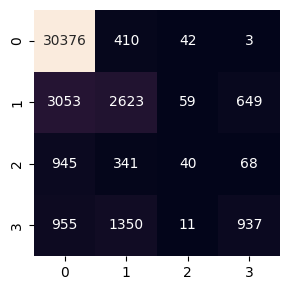

In [99]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [100]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     30831
           1       0.56      0.41      0.47      6384
           2       0.26      0.03      0.05      1394
           3       0.57      0.29      0.38      3253

    accuracy                           0.81     41862
   macro avg       0.56      0.43      0.46     41862
weighted avg       0.77      0.81      0.78     41862



El modelo muestra una precisión global del 81%, con un desempeño notablemente alto en la clase 0, alcanzando una precisión del 86% y un recall del 99%, lo que indica que la mayoría de las instancias de esta clase fueron correctamente clasificadas. Sin embargo, el rendimiento en las demás clases es significativamente menor, con una precisión de 56% en la clase 1, 12% en la clase 2, y 57% en la clase 3. Además, el recall en estas clases es bajo, especialmente en la clase 2 con solo 4%, lo que sugiere que el modelo tiene dificultades para identificar correctamente instancias de estas categorías.

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Raíz del Error cuadrático medio: 0.7651453603619366
Error cuadrático medio: 0.5854474224833979
Coefficient of determination: 0.2499682017186804


Se muestra un error cuadrático medio (MSE) de 0.585, lo que indica que, en promedio, las predicciones tienen un error significativo en relación con los valores reales. La raíz del error cuadrático medio (RMSE) de 0.76 refuerza esta observación, sugiriendo que las predicciones pueden desviarse considerablemente del valor esperado. Además, el coeficiente de determinación (R²) de 0.25 indica que el modelo solo explica aproximadamente el 25% de la variabilidad en los datos de prueba, lo cual es una señal de un bajo poder predictivo. Estos resultados sugieren que el modelo no está capturando bien la relación entre las variables de entrada y salida.

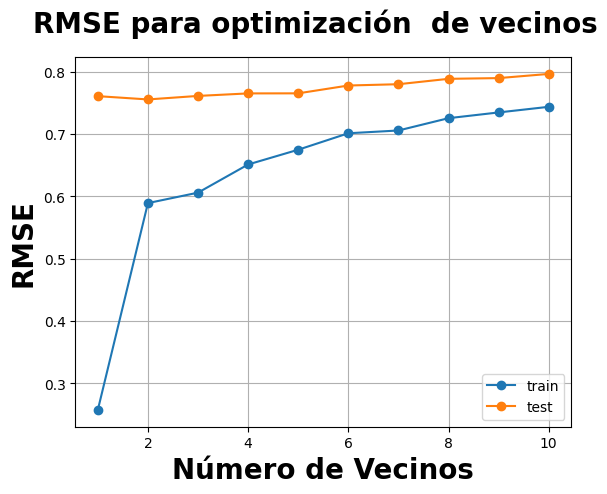

In [102]:
lista_rmse_train = []
lista_rmse_test = []

#Valores de vecinos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10]


for k in k_vecinos:

    model_hiper = KNeighborsClassifier(n_neighbors=k)
    model_hiper.fit(X_train,y_train)

    y_train_pred = model_hiper.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model_hiper.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.suptitle('RMSE para optimización  de vecinos' , fontweight = 'black', fontsize=20)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Número de Vecinos',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');

El gráfico muestra la variación del RMSE (Root Mean Squared Error) en función del número de vecinos en un modelo K-Nearest Neighbors (KNN). Se observa que, a medida que aumenta el número de vecinos, el RMSE tanto en el conjunto de entrenamiento como en el de prueba también aumenta. Inicialmente, el RMSE en el conjunto de entrenamiento es muy bajo, lo que indica sobreajuste cuando el número de vecinos es pequeño. Sin embargo, a partir de aproximadamente K=4, el error en entrenamiento y prueba se estabiliza, aunque el modelo sigue teniendo un error relativamente alto en comparación con valores óptimos. 

Conclusion sobre los modelos: 

In [ ]:
from pickle import dump

dump(model_XGB, open("model_classifier.sav", "wb"))